<a href="https://colab.research.google.com/github/pp24aaq/machine-learning-/blob/main/SVM_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Save as CSV file
df.to_csv("iris_dataset.csv", index=False)

print("Dataset saved as 'iris_dataset.csv'. You can now download or use it.")


Dataset saved as 'iris_dataset.csv'. You can now download or use it.


In [2]:
from google.colab import files
files.download("iris_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv("iris_dataset.csv")
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


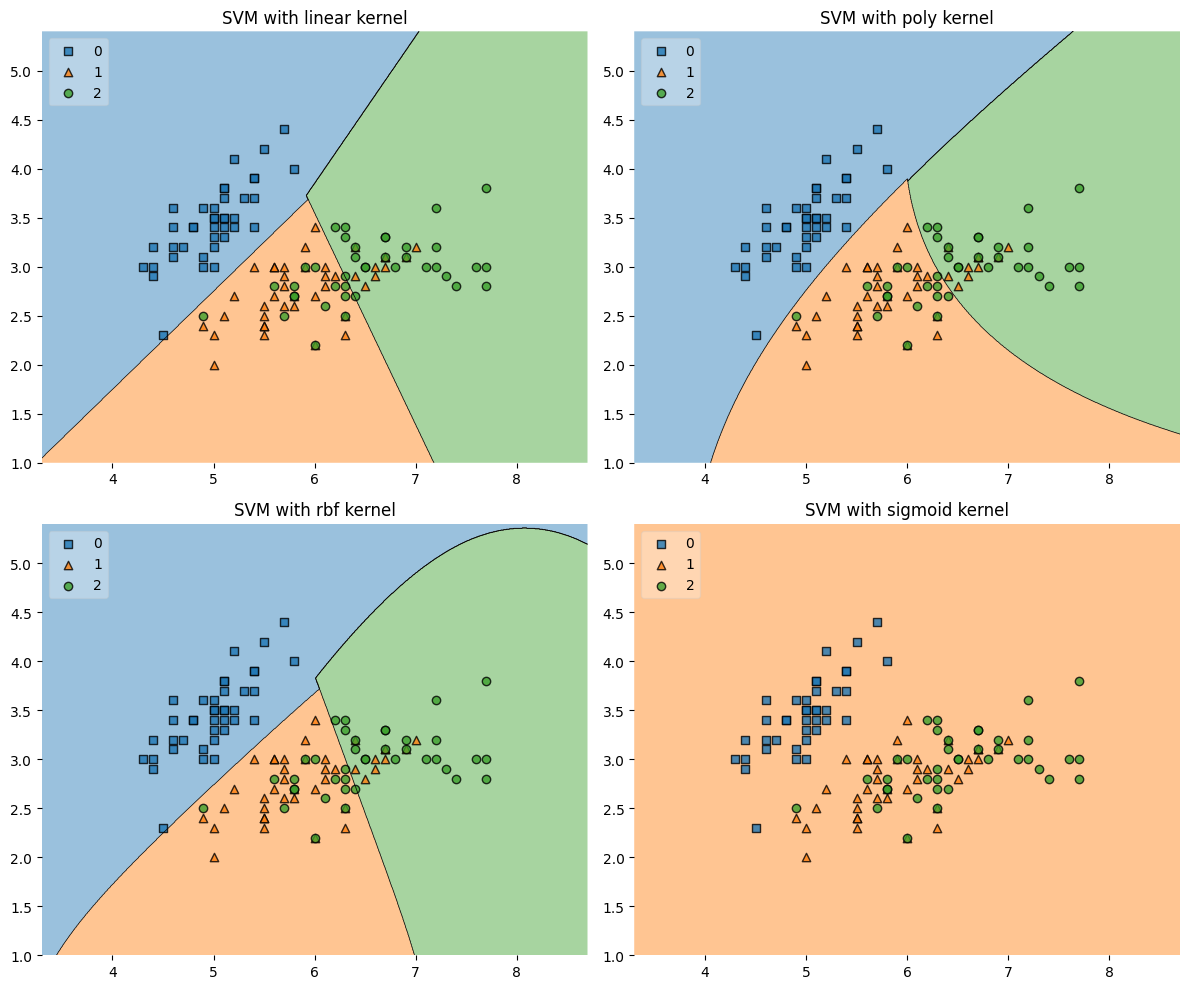

Kernel: linear
Accuracy: 0.9
Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

--------------------------------------------------
Kernel: poly
Accuracy: 0.8333333333333334
Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.78      0.74         9
           2       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted av

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset (Iris dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking first two features for visualization
y = iris.target

# Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different kernel models
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}

# Train models with different kernels
for kernel in kernels:
    clf = SVC(kernel=kernel, gamma='scale')
    clf.fit(X_train, y_train)
    models[kernel] = clf

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for idx, kernel in enumerate(kernels):
    plot_decision_regions(X_train, y_train, clf=models[kernel], ax=axes[idx], legend=2)
    axes[idx].set_title(f"SVM with {kernel} kernel")
plt.tight_layout()
plt.show()

# Evaluate model performance
for kernel, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-"*50)
